# Cho dữ liệu WA_Fn-UseC_-Telco-Customer-Churn.csv chứa thông tin khách hàng. 
# Bộ dữ liệu này được dùng để xây dựng mô hình dự đoán một khách hàng kết thúc mối quan hệ hay hủy/không gia hạn (churn) với doanh nghiệp hay không?

# Bộ dữ liệu gồm 7043 mẫu và 21 thuộc tính

# <span style='color:red'>Yêu cầu:
## Đọc dữ liệu WA_Fn-UseC_-Telco-Customer-Churn.csv, tiền xử lý dữ liệu.
## Chia dữ liệu thành 2 bộ là train và test theo tỷ lệ 80-20.
## Xem xét tính cân bằng giữa hai loại mẫu ở train. Trực quan hóa. Nhận xét.
## Nếu 2 loại mẫu ở train này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Trực quan hóa kết quả.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [102]:
customer = pd.read_csv('data7/Ex3_Customer_Churn Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'].replace(" ", np.nan))
customer['TotalCharges'] = customer['TotalCharges'].fillna(customer['TotalCharges'].median())

for col in customer.columns:
    print(f'{col} ____ {customer[col].dtypes} _____ unique values: {customer[col].unique()}')
    print()

customerID ____ object _____ unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ____ object _____ unique values: ['Female' 'Male']

SeniorCitizen ____ int64 _____ unique values: [0 1]

Partner ____ object _____ unique values: ['Yes' 'No']

Dependents ____ object _____ unique values: ['No' 'Yes']

tenure ____ int64 _____ unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService ____ object _____ unique values: ['No' 'Yes']

MultipleLines ____ object _____ unique values: ['No phone service' 'No' 'Yes']

InternetService ____ object _____ unique values: ['DSL' 'Fiber optic' 'No']

OnlineSecurity ____ object _____ unique values: ['No' 'Yes' 'No internet service']

OnlineBackup ____ object _____ unique values: ['Yes' 'No' 'No internet service']

## Chia dữ liệu thành 2 bộ là train và test theo tỷ lệ 80-20.

## Output: 'Churn' column Yes/No
## Input: all remaining columns, exclude "customerID"

In [105]:
categorical_cols = customer.select_dtypes(include='object').columns
x = pd.get_dummies(customer.drop(['customerID','Churn'], axis=1), columns=categorical_cols[1:-1], drop_first=True).astype(int)
y = pd.get_dummies(customer['Churn'], drop_first=True, prefix='Churn').astype(int)

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

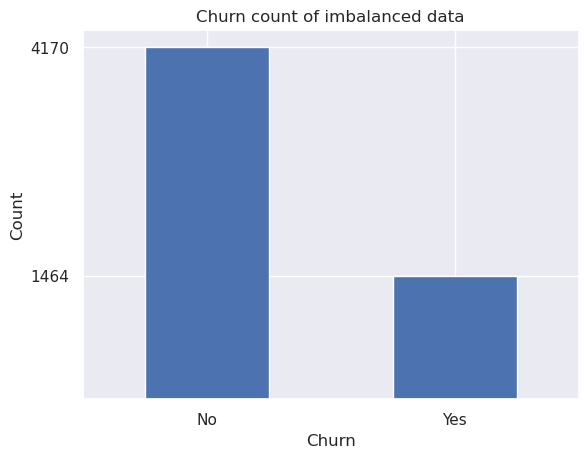

In [107]:
sbn.set_theme(style='darkgrid')
y_train.value_counts().plot.bar()
plt.yticks(y_train.value_counts())
plt.xticks([0,1], labels=['No', 'Yes'], rotation=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn count of imbalanced data')
plt.show()

## <span style='color:red'>Train Logistic Regression model
## <span style='color:yellow'>with IMBALANCED data

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [112]:
log_imbalanced = LogisticRegression().fit(x_train, y_train)
y_pred_imba = log_imbalanced.predict(x_test)
y_prob_imba = log_imbalanced.predict_proba(x_test)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
print(f'Accuracy score of LogReg trained with IMBALANCED data: {accuracy_score(y_test, y_pred_imba)}')
print()
print(f'Confusion matrix of LogReg trained with IMBALANCED data:\n {confusion_matrix(y_test, y_pred_imba)}')
print()
print(f'Classification report of LogReg trained with IMBALANCED data:\n {classification_report(y_test, y_pred_imba, target_names=['No', 'Yes'])}')
print()

Accuracy score of LogReg trained with IMBALANCED data: 0.8062455642299503

Confusion matrix of LogReg trained with IMBALANCED data:
 [[912  92]
 [181 224]]

Classification report of LogReg trained with IMBALANCED data:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1004
         Yes       0.71      0.55      0.62       405

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.80      0.81      0.80      1409




## Target "Yes" has recall = 0.55, f1-score = 0.62 (a bit low)

ROC_AUC score of LogReg trained with IMBALANCED data: 0.8425446362697359



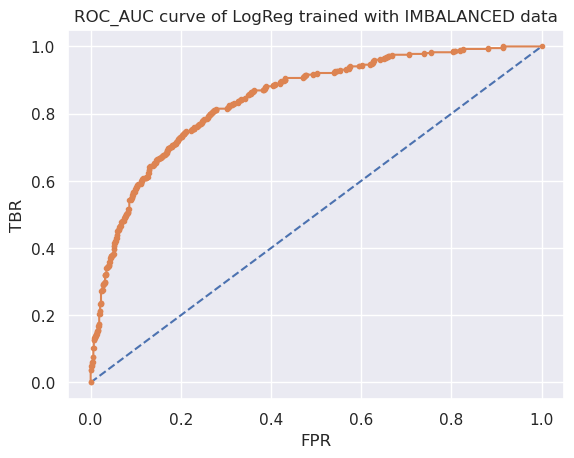

In [120]:
print(f'ROC_AUC score of LogReg trained with IMBALANCED data: {roc_auc_score(y_test, y_prob_imba[:,1])}')
print()

fpr_imba, tpr_imba, threshold_imba = roc_curve(y_test, y_prob_imba[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_imba, tpr_imba, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TBR')
plt.title('ROC_AUC curve of LogReg trained with IMBALANCED data')
plt.show()

## <span style='color:red'>Train Logistic Regression model
## <span style='color:yellow'>with UnderSample data

In [121]:
from imblearn.under_sampling import RandomUnderSampler

In [122]:
und_samp = RandomUnderSampler(random_state=0)
x_train_undsamp, y_train_undsamp = und_samp.fit_resample(x_train, y_train)

In [124]:
log_undsamp = LogisticRegression().fit(x_train_undsamp, y_train_undsamp)
y_pred_undsamp = log_undsamp.predict(x_test)
y_prob_undsamp = log_undsamp.predict_proba(x_test)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
print(f'Accuracy score of LogReg trained with UnderSample data: {accuracy_score(y_test, y_pred_undsamp)}')
print()
print(f'Confusion matrix of LogReg trained with UnderSample data:\n {confusion_matrix(y_test, y_pred_undsamp)}')
print()
print(f'Classification report of LogReg trained with UnderSample data:\n {classification_report(y_test, y_pred_undsamp, target_names=['No', 'Yes'])}')
print()

Accuracy score of LogReg trained with UnderSample data: 0.7672107877927609

Confusion matrix of LogReg trained with UnderSample data:
 [[764 240]
 [ 88 317]]

Classification report of LogReg trained with UnderSample data:
               precision    recall  f1-score   support

          No       0.90      0.76      0.82      1004
         Yes       0.57      0.78      0.66       405

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.80      0.77      0.78      1409




## UnderSample decreases overall accuracy score, and precision of target "Yes", and some other things
## But increases target "Yess" recall

ROC_AUC score of LogReg trained with UnderSample data: 0.8461278343416457



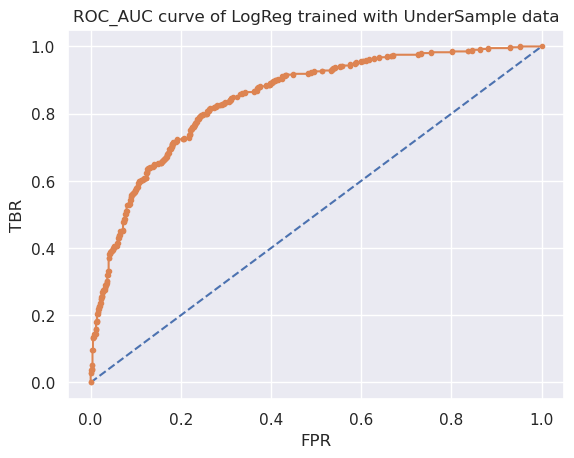

In [126]:
print(f'ROC_AUC score of LogReg trained with UnderSample data: {roc_auc_score(y_test, y_prob_undsamp[:,1])}')
print()

fpr_undsamp, tpr_undsamp, threshold_undsamp = roc_curve(y_test, y_prob_undsamp[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_undsamp, tpr_undsamp, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TBR')
plt.title('ROC_AUC curve of LogReg trained with UnderSample data')
plt.show()

## ROC_AUC score and cuvre seem unchanged

## <span style='color:red'>Train Logistic Regression model
## <span style='color:yellow'>with OverSample data (use SMOTE)

In [127]:
from imblearn.over_sampling import SMOTE

In [129]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [133]:
log_smote = LogisticRegression().fit(x_train_smote, y_train_smote)
y_pred_smote = log_undsamp.predict(x_test)
y_prob_smote = log_undsamp.predict_proba(x_test)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
print(f'Accuracy score of LogReg trained with OverSample data (SMOTE): {accuracy_score(y_test, y_pred_smote)}')
print()
print(f'Confusion matrix of LogReg trained with OverSample data (SMOTE):\n {confusion_matrix(y_test, y_pred_smote)}')
print()
print(f'Classification report of LogReg trained with OverSample data (SMOTE):\n {classification_report(y_test, y_pred_smote, target_names=['No', 'Yes'])}')
print()

Accuracy score of LogReg trained with OverSample data (SMOTE): 0.7672107877927609

Confusion matrix of LogReg trained with OverSample data (SMOTE):
 [[764 240]
 [ 88 317]]

Classification report of LogReg trained with OverSample data (SMOTE):
               precision    recall  f1-score   support

          No       0.90      0.76      0.82      1004
         Yes       0.57      0.78      0.66       405

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.80      0.77      0.78      1409




ROC_AUC score of LogReg trained with OverSample data (SMOTE): 0.8461278343416457



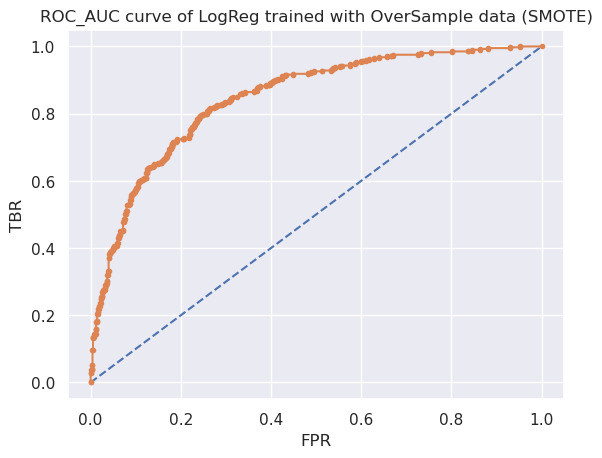

In [135]:
print(f'ROC_AUC score of LogReg trained with OverSample data (SMOTE): {roc_auc_score(y_test, y_prob_smote[:,1])}')
print()

fpr_smote, tpr_smote, threshold_smote = roc_curve(y_test, y_prob_smote[:,1])

plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_smote, tpr_smote, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TBR')
plt.title('ROC_AUC curve of LogReg trained with OverSample data (SMOTE)')
plt.show()